In [231]:
import pandas as pd
import geopandas as gpd
import shapely
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

from geoalchemy2 import Geometry, WKTElement
import  sqlalchemy 

pg = open('db_credentials.txt')
db = pg.read()
pg.close()
engine = sqlalchemy.create_engine(db)

In [90]:
lion_clipped = gpd.read_postgis('SELECT * FROM lion_clipped', engine, geom_col='shape')

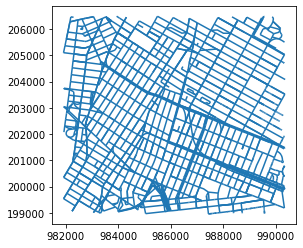

In [91]:
lion_clipped.plot()

In [92]:
taxis_clipped = gpd.read_postgis('SELECT * FROM taxis_2015_clipped', engine, geom_col='pickup_point')

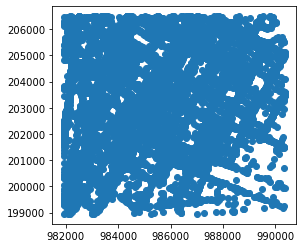

In [93]:
taxis_clipped.plot()

In [94]:
taxis_clipped

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point,id,nn_pickup,nn_dropoff
0,1,2015-05-05 23:51:02,2015-05-05 23:52:31,1,0.30,-73.984550,40.728550,1,N,-73.984497,40.732086,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,POINT (988532.022 204707.335),0101000020D708000025014A31052B2E414E88528D5D25...,54,20901,20911
1,2,2015-05-05 23:51:03,2015-05-05 23:55:59,1,0.99,-73.991577,40.726879,1,N,-74.001953,40.725658,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,POINT (986584.554 204098.331),0101000020D708000051B3E34939052E41F6AF30E12BDC...,60,9038457,20391
2,2,2015-05-16 15:24:55,2015-05-16 15:30:45,2,0.60,-73.988678,40.722511,1,N,-73.979584,40.722969,1,5.5,0.0,0.5,1.26,0.0,0.3,7.56,POINT (987388.319 202507.087),0101000020D7080000B986852CAA352E41CC901D9192BD...,75,87985,9001226
3,1,2015-05-14 10:26:57,2015-05-14 10:34:24,2,1.20,-74.001015,40.729481,1,N,-74.002388,40.716450,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,POINT (983968.765 205046.073),0101000020D70800002F64830848042E4131EE1ADD5373...,90,20404,20353
4,2,2015-05-03 02:11:01,2015-05-03 02:19:23,1,1.09,-74.004555,40.730824,1,N,-73.987587,40.725513,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38,POINT (982987.639 205535.318),0101000020D70800006C50392755242E41C3C9524787DA...,123,20406,9051343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33299,2,2015-05-24 18:45:17,2015-05-24 18:54:44,2,1.65,-73.980530,40.726044,1,N,-74.001404,40.731205,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,POINT (989646.608 203794.450),0101000020D7080000825EB0DD69062E41BE8FF328521B...,1099835,9052456,20421
33300,2,2015-05-24 18:45:20,2015-05-24 18:50:38,5,0.93,-73.988251,40.718376,1,N,-74.001755,40.719196,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30,POINT (987506.949 201000.547),0101000020D708000096E33C28A7052E4193F02B249992...,1099849,78243,20369
33301,2,2015-05-12 17:04:25,2015-05-12 17:06:05,5,0.19,-73.983589,40.731792,1,N,-73.985992,40.732780,1,3.0,1.0,0.5,0.96,0.0,0.3,5.76,POINT (988798.238 205888.724),0101000020D7080000E6599F3DC8272E41C2BCEE8F442D...,1099908,9052815,20910
33302,1,2015-05-12 17:04:26,2015-05-12 17:10:07,1,1.00,-73.990135,40.732437,1,N,-73.998199,40.726166,1,6.0,1.0,0.5,1.55,0.0,0.3,9.35,POINT (986983.991 206123.331),0101000020D7080000EB16F01D5A0D2E41644000A2F2E1...,1099914,9052860,78598


In [95]:
lion_clipped

,objectid,street,safstreetname,featuretyp,segmenttyp,incexflag,rb_layer,nonped,trafdir,trafsrc,specaddr,facecode,seqnum,streetcode,safstreetcode,lgc1,lgc2,lgc3,lgc4,lgc5,lgc6,lgc7,lgc8,lgc9,boe_lgc,segmentid,segcount,locstatus,lzip,rzip,lboro,rboro,l_cd,r_cd,latomicpolygon,ratomicpolygon,lct2010,lct2010suf,rct2010,rct2010suf,lcb2010,lcb2010suf,rcb2010,rcb2010suf,lct2000,lct2000suf,rct2000,rct2000suf,lcb2000,lcb2000suf,rcb2000,rcb2000suf,lct1990,lct1990suf,rct1990,rct1990suf,lassmdist,lelectdist,rassmdist,relectdist,splitelect,lschldist,rschldist,splitschl,lsubsect,rsubsect,sandistind,mapfrom,mapto,borobndry,mh_ri_flag,xfrom,yfrom,xto,yto,arccenterx,arccentery,curveflag,radius,nodeidfrom,nodeidto,nodelevelf,nodelevelt,conparity,twisted,rw_type,physicalid,genericid,nypdid,fdnyid,lblockfaceid,rblockfaceid,legacyid,status,streetwidth_min,streetwidth_max,streetwidth_irr,bikelane,bike_trafdir,active_flag,posted_speed,snow_priority,number_travel_lanes,number_park_lanes,number_total_lanes,carto_display_level,fcc,row_type,llo_hyphen,lhi_hyphen,rlo_hyphen,rhi_hyphen,fromleft,toleft,fromright,toright,join_id,shape_length,shape
0,87405,VARICK STREET,,0,U,,B,,A,DOT,,4535,00020,132685,,01,,,,,,,,,1,0031791,1,,10013,10013,1,1,101,101,309,310,33,,33,,3014,,3013,,33,,33,,3015,,3014,,33,,33,,66,012,66,009,,02,02,None,3B,3B,,12A,12A,,,982363,201511,982394,201751,0,0,,0,0020200,0020202,M,M,,,1,732.0,610.0,,,1222601429,1222604095,0031791,2,58.0,58.0,,2,TF,None,25,C,3,2,5,None,,,15,23,12,24,15,23,12,24,1453501000000,242.417003,"MULTILINESTRING ((982362.711 201510.952, 98239..."
1,87406,HOLLAND TUNNEL EXIT,,0,E,,B,V,W,DCP,,2824,07150,197450,,01,,,,,,,,,1,0103460,1,,10013,10013,1,1,101,101,328,326,33,,33,,3007,,3005,,33,,33,,3007,,3007,,33,,33,,66,012,66,012,,02,02,None,3B,3B,,12A,12A,,,982035,201963,982079,201911,982179,202040,R,163,0020218,0020198,M,M,,,9,569.0,455.0,,,1222606233,1222606821,0103460,2,28.0,38.0,,,,None,,V,3,,3,None,,,None,None,None,None,0,0,0,0,1282401000000,68.522405,"MULTILINESTRING ((982034.953 201963.185, 98204..."
2,87409,HUDSON STREET,,0,U,,B,,W,DCP,,2860,00320,123190,,01,,,,,,,,,1,0031886,1,,10013,10013,1,1,102,102,122,226,37,,37,,1015,,3007,,53,,51,,1008,,2004,,53,,51,,66,068,66,068,,02,02,None,1B,1B,,12A,12A,,,982152,203692,982155,203720,0,0,,0,0020252,0020253,M,M,,,1,610.0,494.0,,,1222603848,1222603732,0031886,2,50.0,50.0,,2,FT,None,25,C,2,2,4,None,,,None,None,None,None,0,0,0,0,1286001000000,28.102279,"MULTILINESTRING ((982151.632 203691.948, 98215..."
3,87410,CHURCH STREET,,0,U,,B,,W,DOT,,0920,01110,115350,,01,,,,,,,,,1,0023396,1,,10013,10007,1,1,101,101,201,111,33,,33,,2011,,1009,,33,,33,,2011,,1010,,33,,33,,66,105,66,007,,02,02,None,3A,3A,,12B,12A,,,982159,199928,982283,200134,0,0,,0,0015372,0020186,M,M,,,1,151.0,135.0,,,0212261957,0212261092,0023396,2,60.0,62.0,,2,FT,None,25,C,3,2,5,None,,,174,192,175,193,174,192,175,193,1092001000000,240.328304,"MULTILINESTRING ((982158.744 199928.072, 98228..."
4,87411,HUDSON STREET,,0,U,,B,,W,DOT,,2860,00340,123190,,01,,,,,,,,,1,0031890,1,,10013,10013,1,1,102,102,105,214,37,,37,,1012,,3002,,53,,51,,1002,,2002,,53,,51,,66,068,66,068,,02,02,None,1B,1B,,12A,12A,,,982190,203997,982221,204262,0,0,,0,0020254,0020268,M,M,,,1,612.0,496.0,,,1222604300,1222601433,0031890,2,50.0,50.0,,2,FT,None,25,C,2,2,4,None,,,323,339,324,344,323,339,324,344,1286001000000,267.010275,"MULTILINESTRING ((982189.647 203996.931, 98222..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,120714,8 AVENUE LINE,,1,U,,B,,,,,0030,02255,127310,,10,02,,,,,,,,1,0314553,1,,10014,10014,1,1,102,10

In [98]:
lion_clipped[lion_clipped.duplicated(subset='segmentid')]

,objectid,street,safstreetname,featuretyp,segmenttyp,incexflag,rb_layer,nonped,trafdir,trafsrc,specaddr,facecode,seqnum,streetcode,safstreetcode,lgc1,lgc2,lgc3,lgc4,lgc5,lgc6,lgc7,lgc8,lgc9,boe_lgc,segmentid,segcount,locstatus,lzip,rzip,lboro,rboro,l_cd,r_cd,latomicpolygon,ratomicpolygon,lct2010,lct2010suf,rct2010,rct2010suf,lcb2010,lcb2010suf,rcb2010,rcb2010suf,lct2000,lct2000suf,rct2000,rct2000suf,lcb2000,lcb2000suf,rcb2000,rcb2000suf,lct1990,lct1990suf,rct1990,rct1990suf,lassmdist,lelectdist,rassmdist,relectdist,splitelect,lschldist,rschldist,splitschl,lsubsect,rsubsect,sandistind,mapfrom,mapto,borobndry,mh_ri_flag,xfrom,yfrom,xto,yto,arccenterx,arccentery,curveflag,radius,nodeidfrom,nodeidto,nodelevelf,nodelevelt,conparity,twisted,rw_type,physicalid,genericid,nypdid,fdnyid,lblockfaceid,rblockfaceid,legacyid,status,streetwidth_min,streetwidth_max,streetwidth_irr,bikelane,bike_trafdir,active_flag,posted_speed,snow_priority,number_travel_lanes,number_park_lanes,number_total_lanes,carto_display_level,fcc,row_type,llo_hyphen,lhi_hyphen,rlo_hyphen,rhi_hyphen,fromleft,toleft,fromright,toright,join_id,shape_length,shape,weight,node_low,node_high
14,87435,CLARKSON STREET,HS 560,0,U,,B,,A,DOT,N,0930,00010,115420,100266,01,,,,,,,,,1,0031926,3,,10014,10014,1,1,102,102,408,409,67,,67,,4006,,4005,,67,,67,,4006,,4005,,67,,67,,66,069,66,071,,02,02,None,1B,1B,,12A,12A,,,982802,204993,982317,205051,0,0,,0,20275,20278,M,M,,,1,867.0,741.0,,,1222601546,1222602833,0031926,2,32.0,36.0,,2,TF,None,20,C,1,2,3,None,,,None,None,None,None,0,0,0,0,10026601000000N,488.335898,"MULTILINESTRING ((982802.172 204992.615, 98231...",{'weight': 488.33589800603},20275,20278
15,87436,CLARKSON STREET,JAMES J WALKER PARK,0,U,,B,,A,DOT,N,0930,00010,115420,111675,01,,,,,,,,,1,0031926,3,,10014,10014,1,1,102,102,408,409,67,,67,,4006,,4005,,67,,67,,4006,,4005,,67,,67,,66,069,66,071,,02,02,None,1B,1B,,12A,12A,,,982802,204993,982317,205051,0,0,,0,20275,20278,M,M,,,1,867.0,741.0,,,1222601546,1222602833,0031926,2,32.0,36.0,,2,TF,None,20,C,1,2,3,None,,,None,None,None,None,0,0,0,0,11167501000000N,488.335898,"MULTILINESTRING ((982802.172 204992.615, 98231...",{'weight': 488.33589800603},20275,20278
21,87446,CANAL STREET,ALBERT CAPSOUTO PARK,0,U,,B,,T,DOT,N,0780,00221,114010,100172,01,,,,,,,,,1,0031869,2,X,10013,10013,1,1,101,102,337,127,33,,37,,3004,,3017,,33,,51,,3002,,1014,,33,,51,,66,009,66,015,,02,02,None,,1B,,12A,12A,,,982778,202257,982611,202413,0,0,,0,20244,20242,M,M,,,1,658.0,539.0,,,1222604194,1222606544,0031869,2,62.0,62.0,,,,None,25,C,4,2,6,10,,,None,None,None,None,0,0,0,0,10017201000000N,228.784485,"MULTILINESTRING ((982778.159 202256.597, 98261...",{'weight': 228.784485060393},20242,20244
28,87458,DUANE STREET,AFRICAN BURIAL GROUND,0,U,,B,,A,DOT,N,1125,00080,116850,113890,01,02,03,,,,,,,1,0023558,2,,10007,10278,1,1,101,101,210,202,31,,31,,1016,,1014,,31,,31,,2002,,2001,,31,,31,,66,005,66,005,,02,02,None,3B,3B,,12B,12B,,,983136,199610,982748,199856,0,0,,0,15477,15377,M,M,,,1,1084.0,951.0,,,0212261010,0212260563,0023558,2,34.0,38.0,,,,None,25,V,2,1,3,None,,,None,None,None,None,0,0,0,0,11389001000000N,459.700218,"MULTILINESTRING ((983135.511 199609.624, 98274...",{'weight': 459.70021795512},15377,15477
46,87506,WALKER STREET,CANAL STREET,0,U,,B,,W,DOT,B,4570,00080,132900,114010,01,,,,,,,,,1,0032314,2,,10013,10013,1,1,103,103,304,303,29,,29,,2000,,2001,,29,,29,,3002,,3001,,29,,29,,65,024,65,024,,02,02,None,1A,1A,,12C,12C,,,984403,200619,984641,200535,0,0,,0,20481,20484,M,M,,,1,943.0,810.0,,,1222605184,1222603987,0032314,2,22.0,22.0,,,,None,25,H,1,1,2,None,,,None,None,206,222,0,0,206,222,11401001000000B,252.504278,"MULTILINESTRING ((984402.913 200619.107, 98464...",{'weight': 252.504278345221},20481,20484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [149]:
lion_clipped['nodeidfrom'] = lion_clipped['nodeidfrom'].astype(int)
lion_clipped['nodeidto'] = lion_clipped['nodeidto'].astype(int)
lion_clipped['weight'] = lion_clipped['shape_length'].apply(lambda x : {'weight' : x})

lion_clipped['node_low'] = lion_clipped.apply(lambda x : min(x['nodeidto'], x['nodeidfrom']), axis = 1)
lion_clipped['node_high'] = lion_clipped.apply(lambda x : max(x['nodeidto'], x['nodeidfrom']), axis = 1)

#xx = lion_clipped.iloc[0]
#min(xx['nodeidto'], xx['nodeidfrom'])

#lion_clipped.duplicated(subset = ['node_low','node_high'])

lion_filt = lion_clipped.drop_duplicates(subset=['node_low','node_high'], keep='first', inplace=False).reset_index(drop=True)

lion_filt['m_id'] = np.arange(lion_filt.shape[0])

In [134]:
lion_filt

,objectid,street,safstreetname,featuretyp,segmenttyp,incexflag,rb_layer,nonped,trafdir,trafsrc,specaddr,facecode,seqnum,streetcode,safstreetcode,lgc1,lgc2,lgc3,lgc4,lgc5,lgc6,lgc7,lgc8,lgc9,boe_lgc,segmentid,segcount,locstatus,lzip,rzip,lboro,rboro,l_cd,r_cd,latomicpolygon,ratomicpolygon,lct2010,lct2010suf,rct2010,rct2010suf,lcb2010,lcb2010suf,rcb2010,rcb2010suf,lct2000,lct2000suf,rct2000,rct2000suf,lcb2000,lcb2000suf,rcb2000,rcb2000suf,lct1990,lct1990suf,rct1990,rct1990suf,lassmdist,lelectdist,rassmdist,relectdist,splitelect,lschldist,rschldist,splitschl,lsubsect,rsubsect,sandistind,mapfrom,mapto,borobndry,mh_ri_flag,xfrom,yfrom,xto,yto,arccenterx,arccentery,curveflag,radius,nodeidfrom,nodeidto,nodelevelf,nodelevelt,conparity,twisted,rw_type,physicalid,genericid,nypdid,fdnyid,lblockfaceid,rblockfaceid,legacyid,status,streetwidth_min,streetwidth_max,streetwidth_irr,bikelane,bike_trafdir,active_flag,posted_speed,snow_priority,number_travel_lanes,number_park_lanes,number_total_lanes,carto_display_level,fcc,row_type,llo_hyphen,lhi_hyphen,rlo_hyphen,rhi_hyphen,fromleft,toleft,fromright,toright,join_id,shape_length,shape,weight,node_low,node_high
0,87405,VARICK STREET,,0,U,,B,,A,DOT,,4535,00020,132685,,01,,,,,,,,,1,0031791,1,,10013,10013,1,1,101,101,309,310,33,,33,,3014,,3013,,33,,33,,3015,,3014,,33,,33,,66,012,66,009,,02,02,None,3B,3B,,12A,12A,,,982363,201511,982394,201751,0,0,,0,20200,20202,M,M,,,1,732.0,610.0,,,1222601429,1222604095,0031791,2,58.0,58.0,,2,TF,None,25,C,3,2,5,None,,,15,23,12,24,15,23,12,24,1453501000000,242.417003,"MULTILINESTRING ((982362.711 201510.952, 98239...",{'weight': 242.417003241581},20200,20202
1,87406,HOLLAND TUNNEL EXIT,,0,E,,B,V,W,DCP,,2824,07150,197450,,01,,,,,,,,,1,0103460,1,,10013,10013,1,1,101,101,328,326,33,,33,,3007,,3005,,33,,33,,3007,,3007,,33,,33,,66,012,66,012,,02,02,None,3B,3B,,12A,12A,,,982035,201963,982079,201911,982179,202040,R,163,20218,20198,M,M,,,9,569.0,455.0,,,1222606233,1222606821,0103460,2,28.0,38.0,,,,None,,V,3,,3,None,,,None,None,None,None,0,0,0,0,1282401000000,68.522405,"MULTILINESTRING ((982034.953 201963.185, 98204...",{'weight': 68.5224050895629},20198,20218
2,87409,HUDSON STREET,,0,U,,B,,W,DCP,,2860,00320,123190,,01,,,,,,,,,1,0031886,1,,10013,10013,1,1,102,102,122,226,37,,37,,1015,,3007,,53,,51,,1008,,2004,,53,,51,,66,068,66,068,,02,02,None,1B,1B,,12A,12A,,,982152,203692,982155,203720,0,0,,0,20252,20253,M,M,,,1,610.0,494.0,,,1222603848,1222603732,0031886,2,50.0,50.0,,2,FT,None,25,C,2,2,4,None,,,None,None,None,None,0,0,0,0,1286001000000,28.102279,"MULTILINESTRING ((982151.632 203691.948, 98215...",{'weight': 28.1022789357178},20252,20253
3,87410,CHURCH STREET,,0,U,,B,,W,DOT,,0920,01110,115350,,01,,,,,,,,,1,0023396,1,,10013,10007,1,1,101,101,201,111,33,,33,,2011,,1009,,33,,33,,2011,,1010,,33,,33,,66,105,66,007,,02,02,None,3A,3A,,12B,12A,,,982159,199928,982283,200134,0,0,,0,15372,20186,M,M,,,1,151.0,135.0,,,0212261957,0212261092,0023396,2,60.0,62.0,,2,FT,None,25,C,3,2,5,None,,,174,192,175,193,174,192,175,193,1092001000000,240.328304,"MULTILINESTRING ((982158.744 199928.072, 98228...",{'weight': 240.32830415404},15372,20186
4,87411,HUDSON STREET,,0,U,,B,,W,DOT,,2860,00340,123190,,01,,,,,,,,,1,0031890,1,,10013,10013,1,1,102,102,105,214,37,,37,,1012,,3002,,53,,51,,1002,,2002,,53,,51,,66,068,66,068,,02,02,None,1B,1B,,12A,12A,,,982190,203997,982221,204262,0,0,,0,20254,20268,M,M,,,1,612.0,496.0,,,1222604300,1222601433,0031890,2,50.0,50.0,,2,FT,None,25,C,2,2,4,None,,,323,339,324,344,323,339,324,344,1286001000000,267.010275,"MULTILINESTRING ((982189.647 203996.931, 98222...",{'weight': 267.010275273972},20254,20268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [57]:
nodes_clipped = gpd.read_postgis('SELECT * FROM node_clipped', engine, geom_col='shape')

In [58]:
# nodes_clipped['m_id'] = np.arange(nodes_clipped.shape[0])
nodes_clipped

,objectid,nodeid,vintersect,shape,m_id
0,14418,15287,,POINT (981924.972 199538.066),0
1,14492,15370,,POINT (983060.380 199008.077),1
2,14493,15371,,POINT (982049.040 199743.784),2
3,14494,15372,,POINT (982158.744 199928.072),3
4,14495,15373,,POINT (982247.176 199061.850),4
...,...,...,...,...,...
1571,131601,9052850,,POINT (983318.094 204202.795),1571
1572,131602,9052851,,POINT (983326.688 204233.600),1572
1573,131612,9052858,,POINT (986990.004 206109.986),1573
1574,131613,9052860,,POINT (986993.119 206126.333),1574


In [59]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from(nodes_clipped['nodeid'].astype(int))

edges = list(lion_filt[['nodeidfrom','nodeidto','weight']].to_records(index=False))

G.add_edges_from(edges)

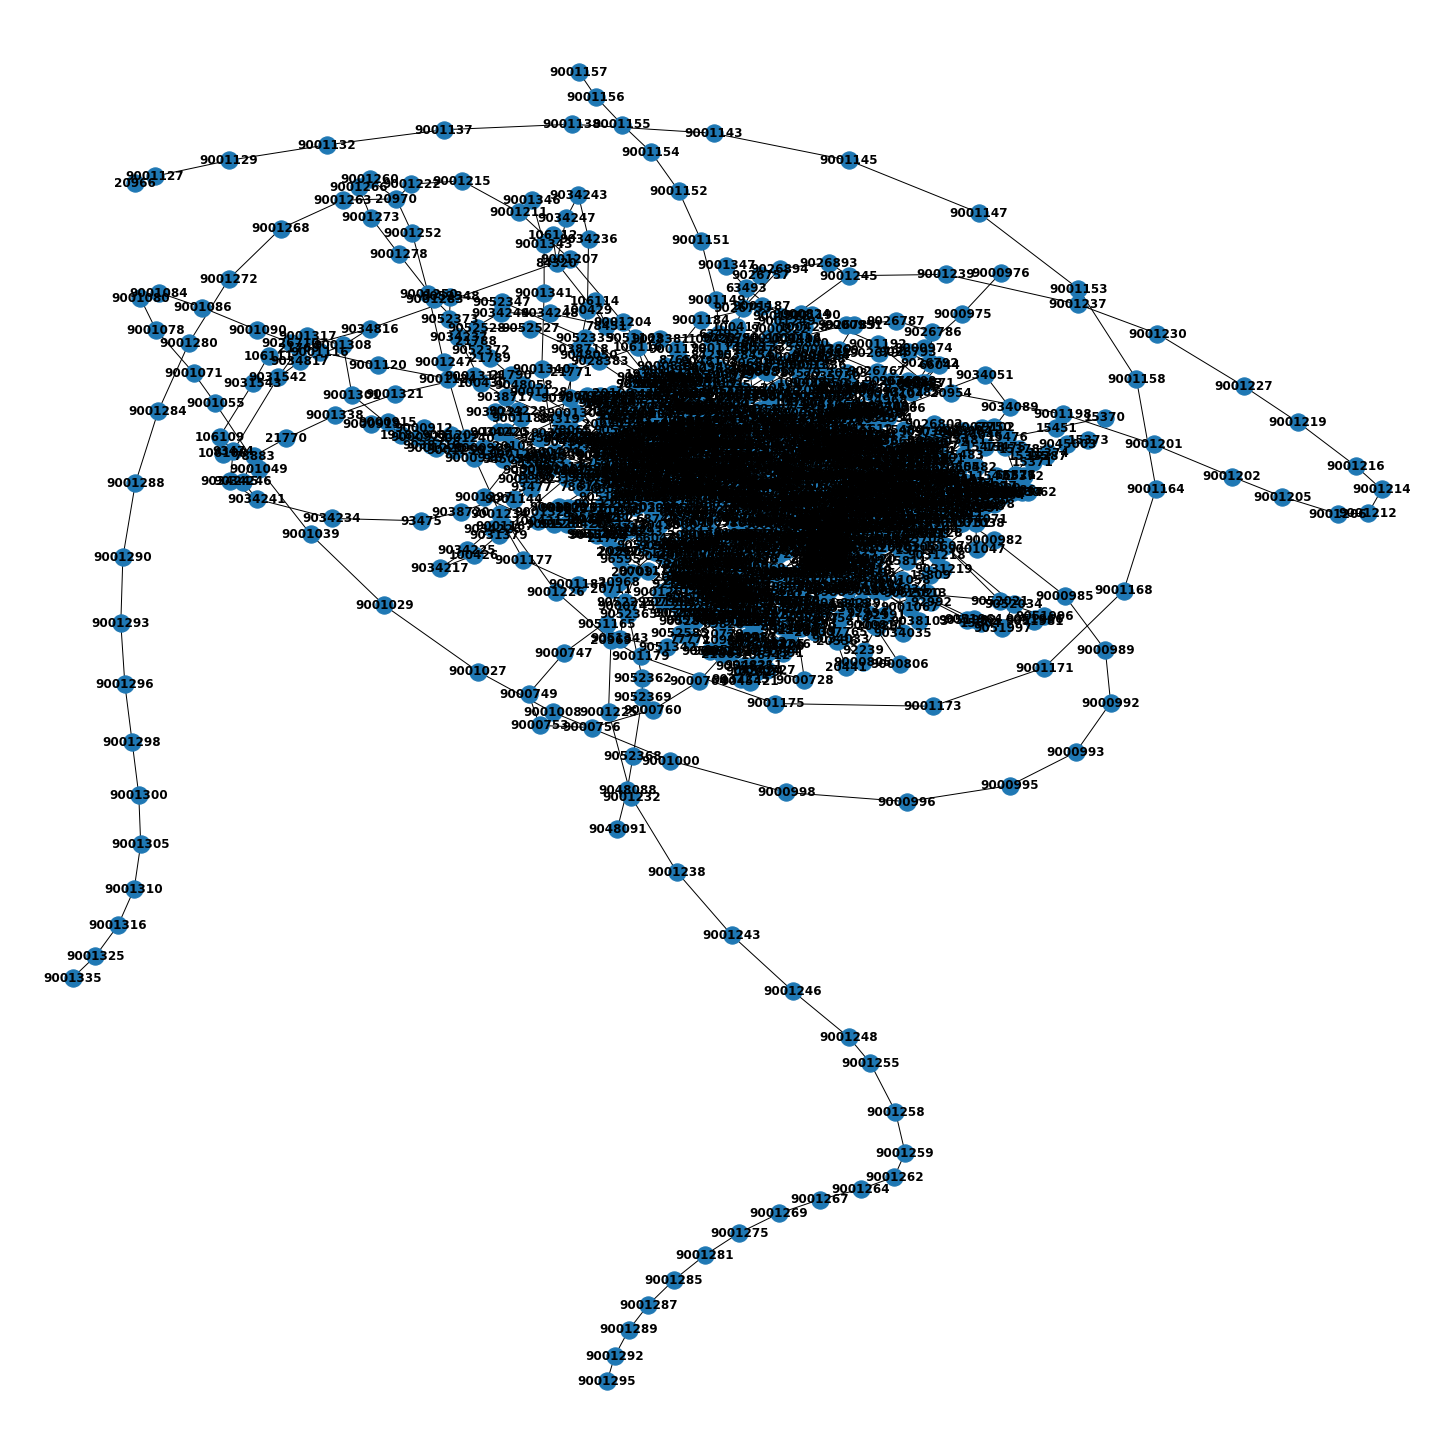

In [61]:
plt.figure(figsize = [20,20])
nx.draw(G, with_labels=True, font_weight='bold')

In [26]:
path1 = nx.dijkstra_path(G, 20488, 20978, weight = 'weight')
#path1 = nx.dijkstra_path(G, 20488, 20978, weight = 'weight')
#path1 = nx.dijkstra_path(G, 20488, 20978, weight = 'weight')

In [27]:
# pd.DataFrame(path1, columns = ['nodeid'])

,nodeid
0,20488
1,20504
2,20507
3,20516
4,78338
5,20597
6,78012
7,20601
8,20618
9,20621


In [28]:
# #nodes_clipped[nodes_clipped['nodeid'] in path1]
# nodes_clipped['path1'] = nodes_clipped['nodeid'].apply(lambda x : x in path1)
# nodes_path1 = nodes_clipped[nodes_clipped['path1']]

In [ ]:
# nodes_path1['x'] = nodes_path1['shape'].apply(lambda x : x.x)
# nodes_path1['y'] = nodes_path1['shape'].apply(lambda x : x.y)
# nodes_path1.to_csv('path1.csv')

In [30]:
paths_all = dict(nx.all_pairs_dijkstra_path(G,weight = 'weight'))

In [ ]:
# paths_all[20601][20901]

In [151]:
p = paths_all[20601][20901]
mr = []
for i in np.arange(1,len(p)):
    nodes_temp = [p[i], p[i-1]]
    node_min = min(nodes_temp)
    node_max = max(nodes_temp)
    print(node_min, node_max)
    row = lion_filt.query('node_low == %d and node_high == %d' % (node_min, node_max))
    print(int(row['m_id']),float(row['shape_length']))
    mr.append([int(row['m_id']),float(row['shape_length'])])

20601 20618
952 295.86033119488
20618 20621
986 263.900207142886
20621 20624
1164 256.606523579321
20624 20626
626 258.101309908205
20626 20717
588 248.215765466458
20717 20719
227 216.039024143818
20719 20722
785 397.420173860323
20722 66006
129 193.090836873608
20797 66006
464 247.329398668004
20797 20800
88 129.305236011326
20800 20803
1159 208.418894524787
20803 78428
484 86.3377753875459
20807 78428
256 345.76669715915
20807 20809
979 174.640849660804
20809 20901
795 754.096874268983


In [171]:
print(np.array(mr))
mra = np.array(mr)
z = np.zeros(np.shape(lion_filt)[0])
print(list(mra[:,0].astype(int)))
print(list(mra[:,1]))
z[mra[:,0].astype(int)] = mra[:,1]

[[ 952.          295.86033119]
 [ 986.          263.90020714]
 [1164.          256.60652358]
 [ 626.          258.10130991]
 [ 588.          248.21576547]
 [ 227.          216.03902414]
 [ 785.          397.42017386]
 [ 129.          193.09083687]
 [ 464.          247.32939867]
 [  88.          129.30523601]
 [1159.          208.41889452]
 [ 484.           86.33777539]
 [ 256.          345.76669716]
 [ 979.          174.64084966]
 [ 795.          754.09687427]]
[952, 986, 1164, 626, 588, 227, 785, 129, 464, 88, 1159, 484, 256, 979, 795]
[295.86033119488, 263.900207142886, 256.606523579321, 258.101309908205, 248.215765466458, 216.039024143818, 397.420173860323, 193.090836873608, 247.329398668004, 129.305236011326, 208.418894524787, 86.3377753875459, 345.76669715915, 174.640849660804, 754.096874268983]


In [204]:
lion_filt.set_index(['node_low','node_high'], inplace = True)
#test.loc[(20254,20268)]
#test.index

In [205]:
def to_linear(p, lion_df):
    mr = []
    for i in np.arange(1,len(p)):
        nodes_temp = [p[i], p[i-1]]
        node_min = min(nodes_temp)
        node_max = max(nodes_temp)
        #print(node_min, node_max)
        row = lion_filt.loc[(node_min,node_max)]
        #print(int(row['m_id']),float(row['shape_length']))
        mr.append([int(row['m_id']),float(row['shape_length'])])
    #print(mr)
    mra = np.array(mr)
    z = np.zeros(np.shape(lion_filt)[0])
    #print(mra[:,0].astype(int))
    #print(mra[:,1])
    z[mra[:,0].astype(int)] = mra[:,1]
    return z

In [184]:
to_linear(p).sum()

4075.1298978500986

In [179]:
nodes_clipped.set_index('nodeid', inplace = True)

In [180]:
nodes_clipped.loc[paths_all[20601][20901]]

,objectid,vintersect,shape,m_id
nodeid,,,,
20601,19498,,POINT (985402.051 203969.828),414
20618,19515,,POINT (985561.103 204219.300),431
20621,19518,,POINT (985704.859 204440.609),434
20624,19521,,POINT (985842.913 204656.914),437
20626,19523,,POINT (985983.074 204873.642),439
20717,19610,,POINT (986117.591 205082.247),513
20719,19612,,POINT (986234.225 205264.098),515
20722,19615,,POINT (986623.772 205185.380),518
66006,62574,,POINT (986811.685 205140.965),724


In [218]:
taxis_clipped = taxis_clipped[taxis_clipped['nn_pickup'] != taxis_clipped['nn_dropoff']]

taxis_clipped['datetime_pickup'] = pd.to_datetime(taxis_clipped['tpep_pickup_datetime'])
taxis_clipped['datetime_dropoff'] = pd.to_datetime(taxis_clipped['tpep_dropoff_datetime'])
taxis_clipped['trip_time'] = taxis_clipped.apply(lambda x: (x['datetime_dropoff']-x['datetime_pickup']).seconds, axis = 1)

(0.0, 3000.0)

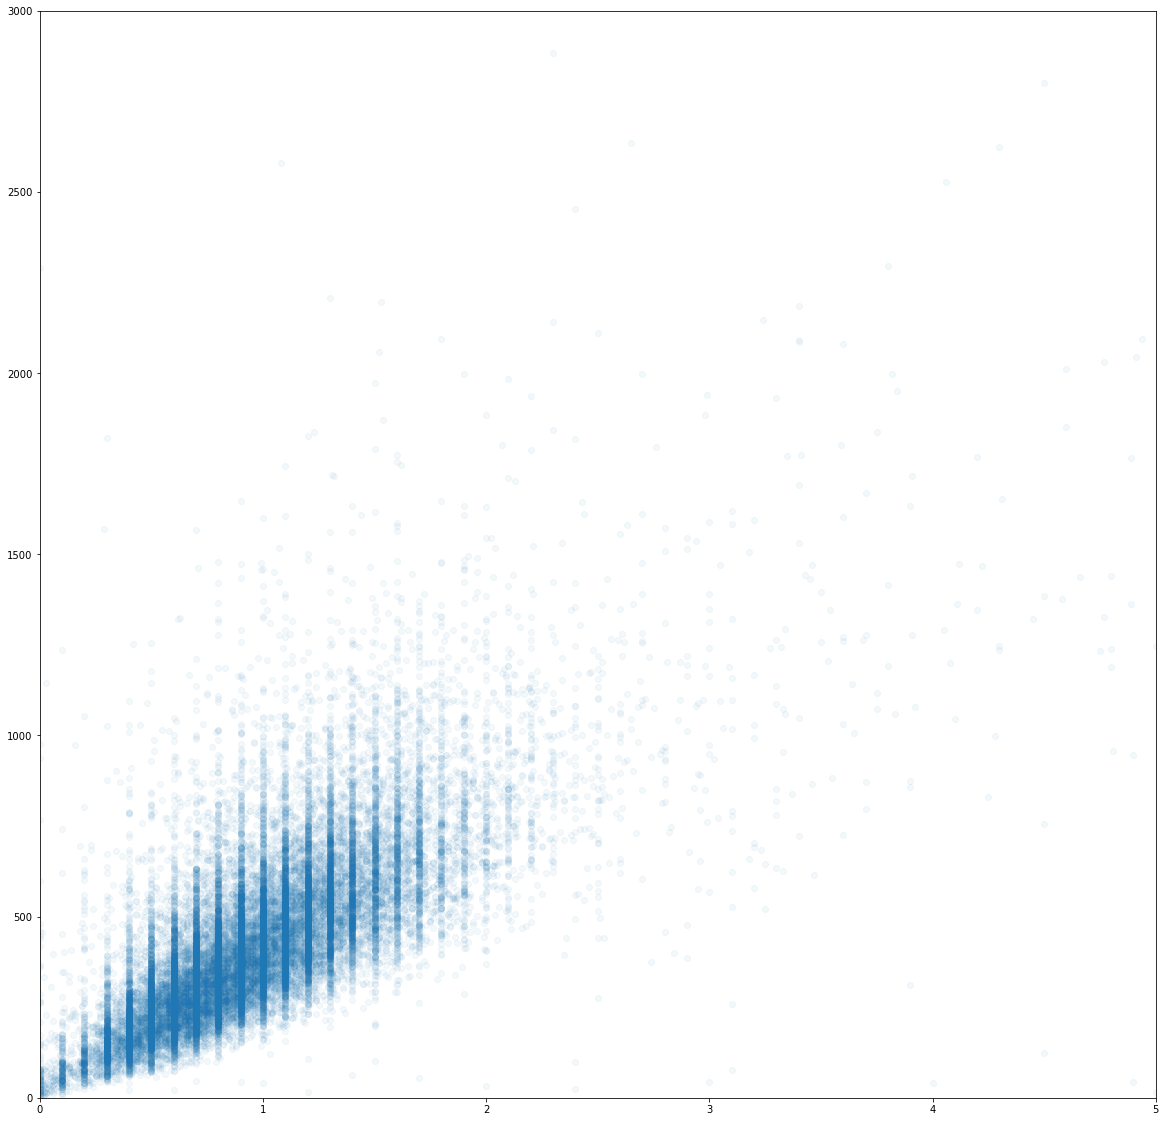

In [251]:
plt.figure(figsize = (20,20))
plt.scatter(taxis_clipped['trip_distance'], taxis_clipped['trip_time'], alpha = 0.05)
plt.xlim(0, 5)
plt.ylim(0, 3000)

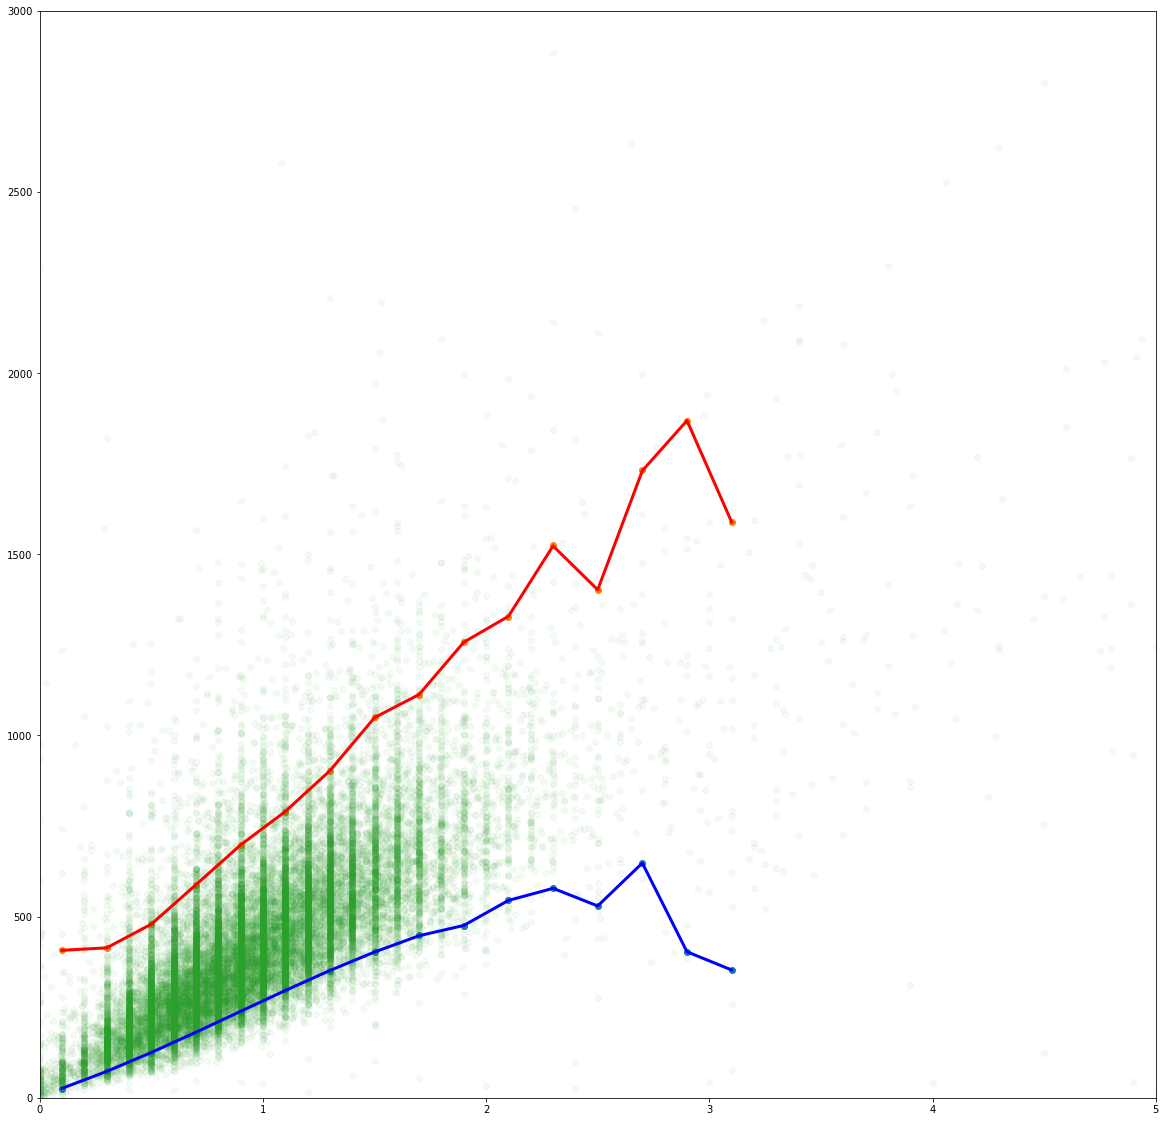

In [308]:
bins = np.arange(0,3.4,0.2)
labels = bins[0:-1] + 0.1
#print(bins)
#print(labels)
taxis_clipped['dbin'] = pd.cut(taxis_clipped['trip_distance'], bins=bins, labels = labels)
lower = taxis_clipped.groupby('dbin')['trip_time'].quantile(0.05)
upper = taxis_clipped.groupby('dbin')['trip_time'].quantile(0.95)
lower_arr = pd.DataFrame(lower).reset_index().to_numpy()
upper_arr = pd.DataFrame(upper).reset_index().to_numpy()

plt.figure(figsize = (20,20))

plt.scatter(lower_arr[:,0],lower_arr[:,1])
plt.scatter(upper_arr[:,0],upper_arr[:,1])

plt.scatter(taxis_clipped['trip_distance'], taxis_clipped['trip_time'], alpha = 0.05)
plt.xlim(0, 5)
plt.ylim(0, 3000)

from scipy.interpolate import UnivariateSpline
spl_lower = UnivariateSpline(lower_arr[:,0],lower_arr[:,1])
spl_upper = UnivariateSpline(upper_arr[:,0],upper_arr[:,1])
#spl((lower_arr[:,0]).astype(float))
plt.plot(lower_arr[:,0],spl_lower((lower_arr[:,0]).astype(float)), 'b', lw=3)
plt.plot(upper_arr[:,0],spl_upper((upper_arr[:,0]).astype(float)), 'r', lw=3)
#float(spl(1.356))
taxis_clipped['trip_time_p5'] = taxis_clipped['trip_distance'].apply(lambda x : float(spl_lower(x)))
taxis_clipped['trip_time_p95'] = taxis_clipped['trip_distance'].apply(lambda x : float(spl_upper(x)))
taxis_clipped['filt'] = taxis_clipped.apply(lambda x : \
                                            (x['trip_distance'] >= 0.5) \
                                            and (x['trip_distance'] <= 2) \
                                            and (x['trip_time'] >= x['trip_time_p5']) \
                                            and (x['trip_time'] <= x['trip_time_p95']), axis = 1)

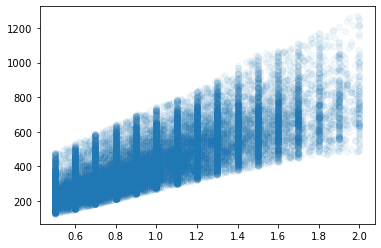

In [333]:
taxis_filt = taxis_clipped[taxis_clipped['filt']].reset_index()

plt.scatter(taxis_filt['trip_distance'], taxis_filt['trip_time'], alpha = 0.05)

In [334]:
taxis_filt

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point,id,nn_pickup,nn_dropoff,datetime_pickup,datetime_dropoff,trip_time,dbin,trip_time_p5,trip_time_p95,filt
0,1,2,2015-05-05 23:51:03,2015-05-05 23:55:59,1,0.99,-73.991577,40.726879,1,N,-74.001953,40.725658,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,POINT (986584.554 204098.331),0101000020D708000051B3E34939052E41F6AF30E12BDC...,60,9038457,20391,2015-05-05 23:51:03,2015-05-05 23:55:59,296,0.9,264.552516,740.173975,True
1,2,2,2015-05-16 15:24:55,2015-05-16 15:30:45,2,0.60,-73.988678,40.722511,1,N,-73.979584,40.722969,1,5.5,0.0,0.5,1.26,0.0,0.3,7.56,POINT (987388.319 202507.087),0101000020D7080000B986852CAA352E41CC901D9192BD...,75,87985,9001226,2015-05-16 15:24:55,2015-05-16 15:30:45,350,0.5,152.640765,530.543774,True
2,3,1,2015-05-14 10:26:57,2015-05-14 10:34:24,2,1.20,-74.001015,40.729481,1,N,-74.002388,40.716450,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,POINT (983968.765 205046.073),0101000020D70800002F64830848042E4131EE1ADD5373...,90,20404,20353,2015-05-14 10:26:57,2015-05-14 10:34:24,447,1.1,323.977128,839.105231,True
3,4,2,2015-05-03 02:11:01,2015-05-03 02:19:23,1,1.09,-74.004555,40.730824,1,N,-73.987587,40.725513,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38,POINT (982987.639 205535.318),0101000020D70800006C50392755242E41C3C9524787DA...,123,20406,9051343,2015-05-03 02:11:01,2015-05-03 02:19:23,502,1.1,293.142220,785.251761,True
4,5,1,2015-05-02 23:39:58,2015-05-02 23:47:23,1,1.00,-73.994293,40.719948,1,N,-73.979874,40.713902,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,POINT (985831.909 201572.982),0101000020D70800008C3F74F80A352E41F079BDC55556...,141,9038437,16166,2015-05-02 23:39:58,2015-05-02 23:47:23,445,0.9,267.428075,744.706961,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25337,33298,2,2015-05-24 18:31:14,2015-05-24 18:37:50,2,0.94,-73.994606,40.725849,1,N,-73.989616,40.720863,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80,POINT (985745.068 203723.016),0101000020D708000022AD328CF01F2E410CEB563F95A5...,1099790,20607,20765,2015-05-24 18:31:14,2015-05-24 18:37:50,396,0.9,250.137737,717.039660,True
25338,33299,2,2015-05-24 18:45:17,2015-05-24 18:54:44,2,1.65,-73.980530,40.726044,1,N,-74.001404,40.731205,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,POINT (989646.608 203794.450),0101000020D7080000825EB0DD69062E41BE8FF328521B...,1099835,9052456,20421,2015-05-24 18:45:17,2015-05-24 18:54:44,567,1.7,436.656612,1091.784579,True
25339,33300,2,2015-05-24 18:45:20,2015-05-24 18:50:38,5,0.93,-73.988251,40.718376,1,N,-74.001755,40.719196,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30,POINT (987506.949 201000.547),0101000020D708000096E33C28A7052E4193F02B249992...,1099849,78243,20369,2015-05-24 18:45:20,2015-05-24 18:50:38,318,0.9,247.249093,712.282954,True
25340,33302,1,2015-05-12 17:04:26,2015-05-12 17:10:07,1,1.00,-73.990135,40.732437,1,N,-73.998199,40.726166,1,6.0,1.0,0.5,1.55,0.0,0.3,9.35,POINT (986983.991 206123.331),0101000020D7080000EB16F01D5A0D2E41644000A2F2E1...,1099914,9052860,78598,2015-05-12 17:04:26,2015-05-12 17:10:07,341,0.9,267.428075,744.706961,True


In [381]:
num_segments = lion_filt.shape[0]
num_trips = taxis_filt.shape[0]

taxis_filt['path'] = '' 
taxis_filt['path_distance_mi'] = 0
#taxis_filt.reset_index(inplace = True) # paranioa
for i in np.arange(num_trips):
    #print(i)
    #print("%d of %d" % (i, num_trips), end="\r", flush=True)
    start_node = taxis_filt.iloc[i]['nn_pickup']
    end_node = taxis_filt.iloc[i]['nn_dropoff']
    path = paths_all[start_node][end_node]
    #mlocs = nodes_clipped[path]
    #mlocs = list(nodes_clipped.loc[path]['m_id'])
    #print(start_node,end_node)
    mlocs = to_linear(path)
    #print(list(mlocs))
    
    ######## HOW TO INCORPORATE DISTANCE???
    ######## DROP DUPLICATES ON THE NODEFROM AND NODETO COLUMN
    #distance = list(nodes_clipped.loc[path]['m_id'])
    #print(taxis_clipped.iloc[i])
    #matrix[i][]
    #print(path)
    #print(mlocs)
    matrix[i] = mlocs
    taxis_filt.loc[i, 'path'] = str(path)
    taxis_filt.loc[i, 'path_distance_mi'] = mlocs.sum()/5280
    #print(mlocs.sum()/5280)
    #break

In [375]:
taxis_filt.loc[0,'path']

'[9038457, 20710, 20708, 20707, 20622, 20609, 20607, 78045, 78571, 20600, 20597, 20517, 20515, 78441, 78442, 20512, 20511, 20391]'

In [382]:
taxis_filt

,level_0,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_point,dropoff_point,id,nn_pickup,nn_dropoff,datetime_pickup,datetime_dropoff,trip_time,dbin,trip_time_p5,trip_time_p95,filt,path,path_distance,path_distance_mi
0,0,1,2,2015-05-05 23:51:03,2015-05-05 23:55:59,1,0.99,-73.991577,40.726879,1,N,-74.001953,40.725658,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,POINT (986584.554 204098.331),0101000020D708000051B3E34939052E41F6AF30E12BDC...,60,9038457,20391,2015-05-05 23:51:03,2015-05-05 23:55:59,296,0.9,264.552516,740.173975,True,"[9038457, 20710, 20708, 20707, 20622, 20609, 2...",0,0.742511
1,1,2,2,2015-05-16 15:24:55,2015-05-16 15:30:45,2,0.60,-73.988678,40.722511,1,N,-73.979584,40.722969,1,5.5,0.0,0.5,1.26,0.0,0.3,7.56,POINT (987388.319 202507.087),0101000020D7080000B986852CAA352E41CC901D9192BD...,75,87985,9001226,2015-05-16 15:24:55,2015-05-16 15:30:45,350,0.5,152.640765,530.543774,True,"[87985, 78543, 9034971, 9035751, 77948, 900782...",0,0.594903
2,2,3,1,2015-05-14 10:26:57,2015-05-14 10:34:24,2,1.20,-74.001015,40.729481,1,N,-74.002388,40.716450,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,POINT (983968.765 205046.073),0101000020D70800002F64830848042E4131EE1ADD5373...,90,20404,20353,2015-05-14 10:26:57,2015-05-14 10:34:24,447,1.1,323.977128,839.105231,True,"[20404, 78011, 20402, 78315, 20401, 20395, 203...",0,1.055677
3,3,4,2,2015-05-03 02:11:01,2015-05-03 02:19:23,1,1.09,-74.004555,40.730824,1,N,-73.987587,40.725513,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38,POINT (982987.639 205535.318),0101000020D70800006C50392755242E41C3C9524787DA...,123,20406,9051343,2015-05-03 02:11:01,2015-05-03 02:19:23,502,1.1,293.142220,785.251761,True,"[20406, 20407, 20413, 20416, 20423, 20424, 205...",0,1.054208
4,4,5,1,2015-05-02 23:39:58,2015-05-02 23:47:23,1,1.00,-73.994293,40.719948,1,N,-73.979874,40.713902,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,POINT (985831.909 201572.982),0101000020D70800008C3F74F80A352E41F079BDC55556...,141,9038437,16166,2015-05-02 23:39:58,2015-05-02 23:47:23,445,0.9,267.428075,744.706961,True,"[9038437, 20584, 20581, 20574, 20658, 20661, 2...",0,0.961591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25337,25337,33298,2,2015-05-24 18:31:14,2015-05-24 18:37:50,2,0.94,-73.994606,40.725849,1,N,-73.989616,40.720863,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80,POINT (985745.068 203723.016),0101000020D708000022AD328CF01F2E410CEB563F95A5...,1099790,20607,20765,2015-05-24 18:31:14,2015-05-24 18:37:50,396,0.9,250.137737,717.039660,True,"[20607, 20608, 77924, 77925, 78673, 78674, 786...",0,0.527992
25338,25338,33299,2,2015-05-24 18:45:17,2015-05-24 18:54:44,2,1.65,-73.980530,40.726044,1,N,-74.001404,40.731205,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76,POINT (989646.608 203794.450),0101000020D7080000825EB0DD69062E41BE8FF328521B...,1099835,9052456,20421,2015-05-24 18:45:17,2015-05-24 18:54:44,567,1.7,436.656612,1091.784579,True,"[9052456, 20975, 20976, 9052343, 9052341, 9051...",0,1.359849
25339,25339,33300,2,2015-05-24 18:45:20,2015-05-24 18:50:38,5,0.93,-73.988251,40.718376,1,N,-74.001755,40.719196,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30,POINT (987506.949 201000.547),0101000020D708000096E33C28A7052E4193F02B249992...,1099849,78243,20369,2015-05-24 18:45:20,2015-05-24 18:50:38,318,0.9,247.249093,712.282954,True,"[78243, 78242, 77972, 77971, 92910, 78146, 785...",0,0.873674
25340,25340,33302,1,2015-05-12 17:04:26,2015-05-12 17:10:07,1,1.00,-73.990135,40.732437,1,N,-73.998199,40.726166,1,6.0,1.0,0.5,1.55,0.0,0.3,9.35,POINT (986983.991 206123.331),0101000020D7080000EB16F01D5A0D2E41644000A2F2E1...,1099914,9052860,78598,2015-05-12 17:04:26,2015-05-12 17:10:07,341,0.9,267.428075,744.706961,True,"[9052860, 9052858, 20728, 20727, 63341, 20723,...",0,0.746944


(0.0, 2.0)

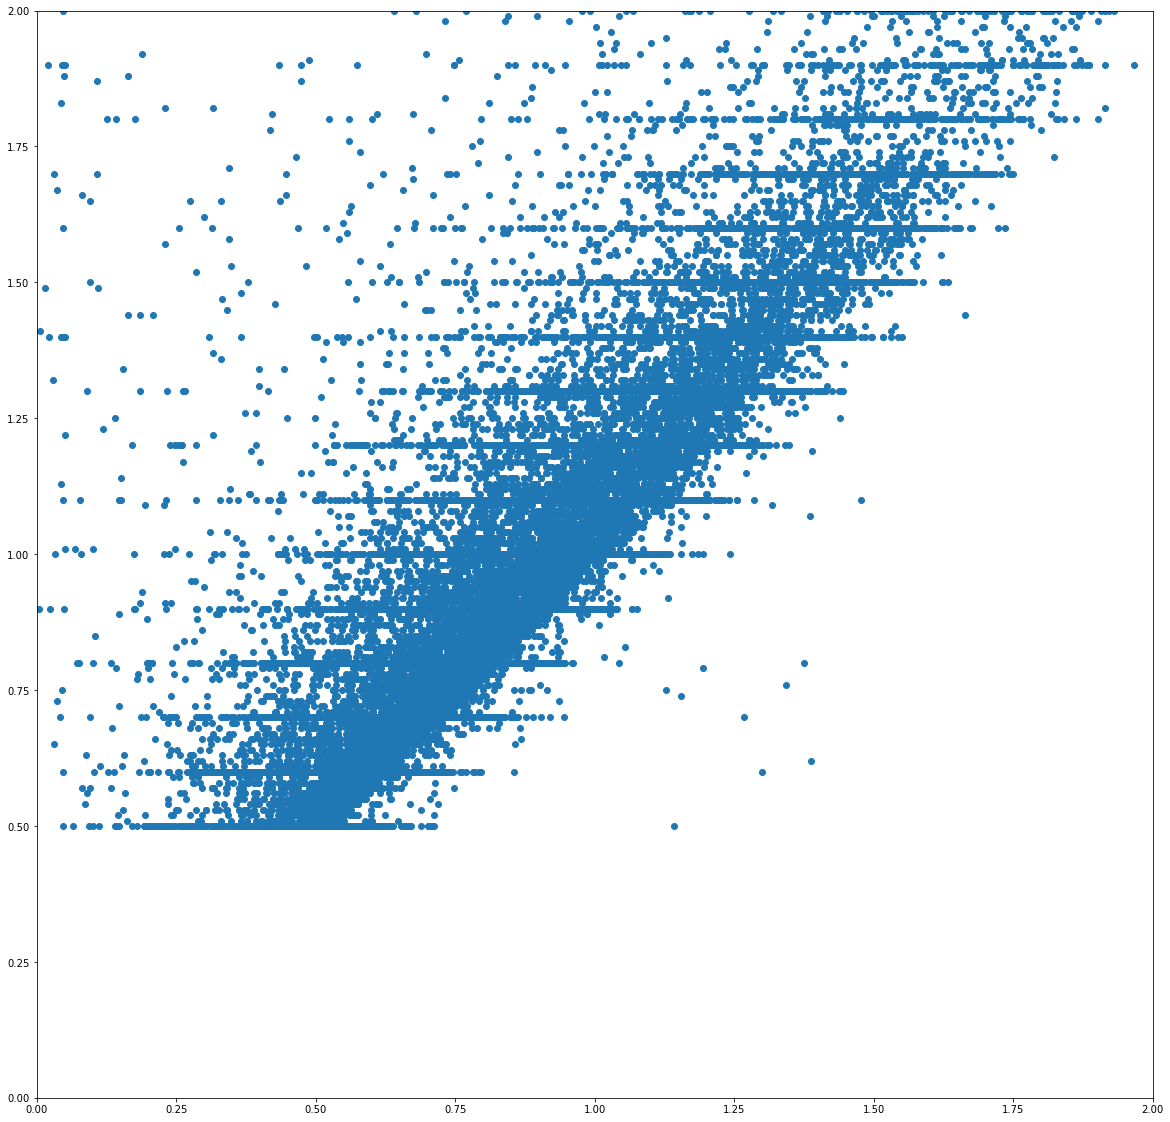

In [387]:
plt.figure(figsize=(20,20))
plt.scatter(taxis_filt['path_distance_mi'],taxis_filt['trip_distance'])

plt.xlim(0, 2)
plt.ylim(0, 2)

In [401]:
taxis_filt['dist_error'] = (taxis_filt['trip_distance'] - taxis_filt['path_distance_mi']).abs()
taxis_filt2 = taxis_filt[taxis_filt['dist_error'] < 0.4]

(0.0, 2.0)

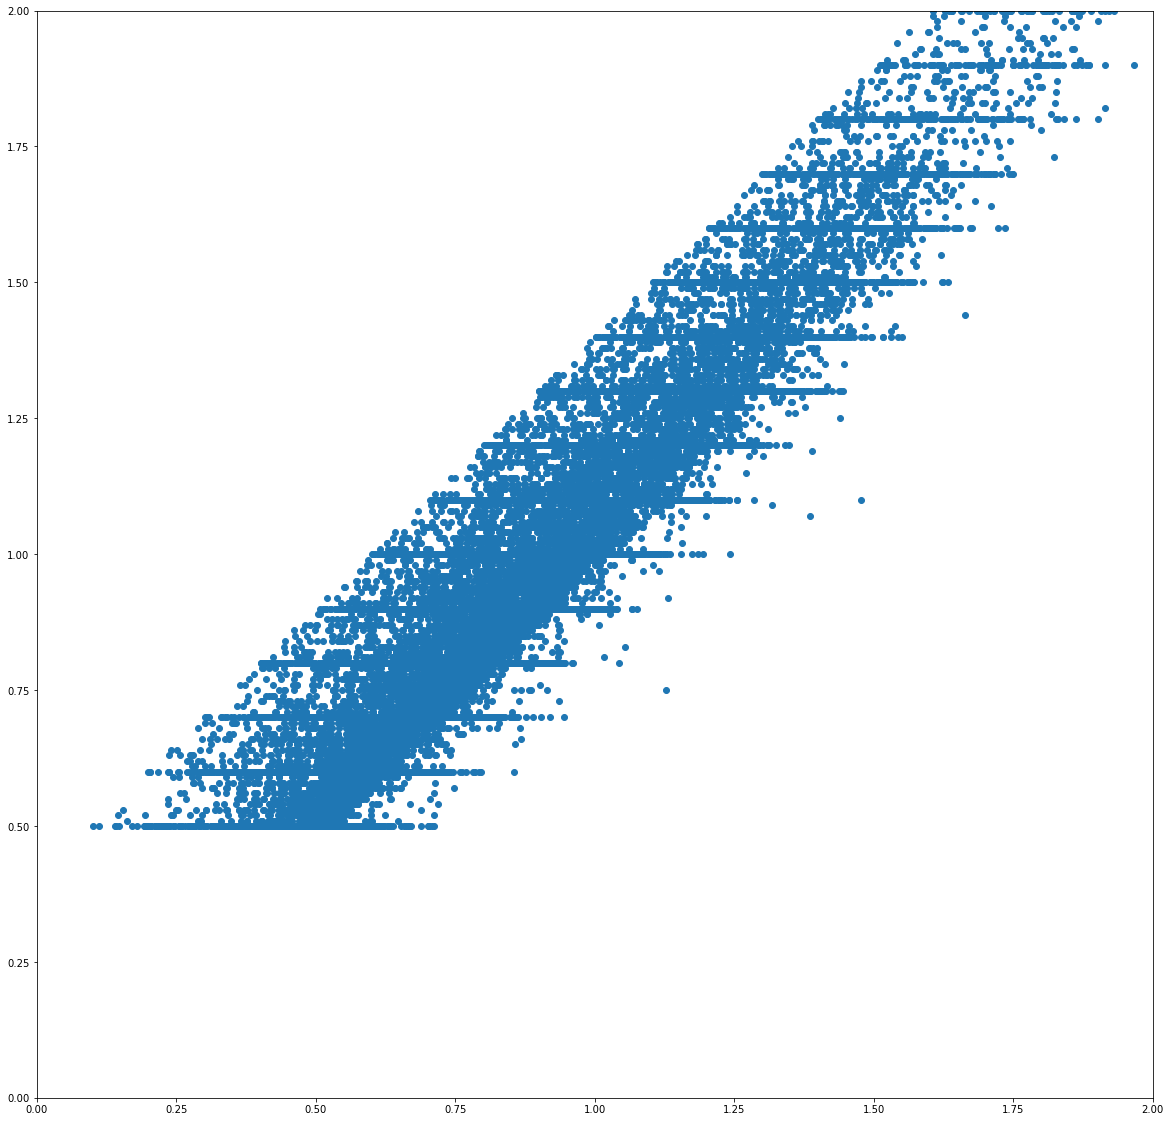

In [402]:
plt.figure(figsize=(20,20))
plt.scatter(taxis_filt2['path_distance_mi'],taxis_filt2['trip_distance'])

plt.xlim(0, 2)
plt.ylim(0, 2)

In [ ]:
trips = taxis_filt2.index
matrix = np.zeros([len(trips), num_segments])
for i in trips:
    path_str = taxis_filt2.loc[i,'path'][1:-1].split(', ')
    path = [int(i) for i in path_str] 
    mlocs = to_linear(path)
    matrix[i] = mlocs
    #break
# print(path)
# print(path_str)
#list(mlocs)
mlocs1 = np.argwhere(mlocs > 0).flatten()
#print(path)
lion_filt[lion_filt['m_id'].isin(mlocs1)]

In [427]:
trip_times = taxis_filt2['trip_time']

In [428]:
print(matrix.shape)
print(trip_times.shape)


(23648, 2416)
(23648,)


In [430]:
x = np.linalg.lstsq(matrix,trip_times)

<ipython-input-430-4ceedddecac6>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(matrix,trip_times)


In [431]:
x[0]

array([-4.39125233e-01,  1.69963209e+11,  5.36166140e-01, ...,
       -1.52854919e-02,  4.22420025e-01,  2.70036820e+08])

In [435]:
from scipy.optimize import nnls
x2 = nnls(matrix, trip_times)

(array([1.512e+03, 3.400e+01, 2.800e+01, 3.200e+01, 2.700e+01, 2.900e+01,
        2.800e+01, 2.600e+01, 2.600e+01, 2.200e+01, 3.200e+01, 2.800e+01,
        1.800e+01, 2.600e+01, 2.000e+01, 2.000e+01, 1.300e+01, 2.300e+01,
        1.300e+01, 1.100e+01, 1.300e+01, 1.400e+01, 1.700e+01, 1.300e+01,
        2.000e+01, 1.400e+01, 1.000e+01, 6.000e+00, 1.200e+01, 6.000e+00,
        8.000e+00, 5.000e+00, 8.000e+00, 1.000e+01, 4.000e+00, 4.000e+00,
        1.000e+01, 6.000e+00, 2.000e+00, 7.000e+00, 6.000e+00, 8.000e+00,
        5.000e+00, 7.000e+00, 6.000e+00, 1.000e+01, 4.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 4.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 3.000e+0

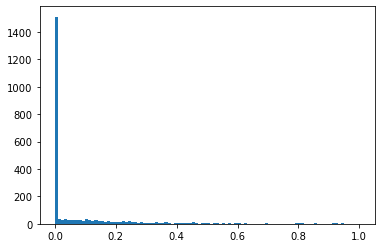

In [439]:
plt.hist(x2[0], bins = 100, range=[0,1])

In [440]:
from scipy.optimize import lsq_linear
lb = np.zeros(num_segments) # 1 ft / 1000 sec
ub = np.ones(num_segments) # 1 ft / 50 sec

x3 = lsq_linear(matrix, trip_times, bounds = (lb, ub))

In [433]:
x3

 active_mask: array([1, 0, 1, ..., 1, 1, 1])
        cost: 1737977577.4797583
         fun: array([-217.59083965, -287.17820721, -335.52050526, ..., -262.18278392,
       -209.69955967, -450.91855639])
     message: 'The relative change of the cost function is less than `tol`.'
         nit: 6
  optimality: 8.627931081630148e-10
      status: 2
     success: True
           x: array([0.02  , 0.0105, 0.02  , ..., 0.02  , 0.02  , 0.02  ])

(array([1.194e+03, 4.400e+01, 4.100e+01, 3.200e+01, 3.100e+01, 3.900e+01,
        2.200e+01, 4.200e+01, 2.600e+01, 2.600e+01, 1.440e+02, 3.000e+01,
        2.400e+01, 2.600e+01, 1.600e+01, 2.600e+01, 1.700e+01, 2.200e+01,
        1.900e+01, 1.800e+01, 1.300e+01, 1.600e+01, 1.400e+01, 1.600e+01,
        1.700e+01, 1.400e+01, 1.200e+01, 1.600e+01, 1.300e+01, 9.000e+00,
        7.000e+00, 1.400e+01, 7.000e+00, 9.000e+00, 1.500e+01, 5.000e+00,
        9.000e+00, 1.400e+01, 6.000e+00, 5.000e+00, 8.000e+00, 7.000e+00,
        8.000e+00, 8.000e+00, 9.000e+00, 9.000e+00, 4.000e+00, 2.000e+00,
        8.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 8.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 5.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 6.000e+00, 4.000e+0

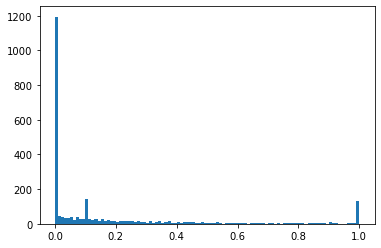

In [441]:
plt.hist(x3['x'], bins = 100, range=[0,1])

In [ ]:
x

In [ ]:
residuals

In [ ]:
rank

In [ ]:
x

In [ ]:
np.shape(matrix)

In [ ]:
np.shape(trip_times)